# Model under development

# WARNING
For plotly map rendering you must launch jupyter notebooks with a higher data limit:
<br> `jupyter notebook --NotebookApp.iopub_data_rate_limit=214748364`

# TODO 
- how to deal with missingness



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.download_DHS import load_DHS_data

In [3]:
df = load_DHS_data()
df.shape

(10834, 7)

In [4]:
df.head()

,CountryName,DHS_CountryCode,SurveyYear,SurveyId,Indicator,IndicatorId,Value
0,Afghanistan,AF,2015,AF2015DHS,General fertility rate,FE_FRTR_W_GFR,175.0
1,Albania,AL,2008,AL2008DHS,General fertility rate,FE_FRTR_W_GFR,46.0
2,Albania,AL,2017,AL2017DHS,General fertility rate,FE_FRTR_W_GFR,57.0
3,Armenia,AM,2000,AM2000DHS,General fertility rate,FE_FRTR_W_GFR,56.0
4,Armenia,AM,2005,AM2005DHS,General fertility rate,FE_FRTR_W_GFR,58.0


In [5]:
df_wide = df.pivot(index='SurveyId', columns='IndicatorId', values='Value')

In [6]:
df_wide.head()

IndicatorId,AH_HINS_W_NON,AH_TOBC_M_NON,AH_TOBC_W_NON,AN_ANEM_W_ANY,AN_ANEM_W_MOD,AN_ANEM_W_SEV,AN_NUTS_W_OWT,AN_NUTS_W_SHT,AN_NUTS_W_TH2,CH_ARIS_C_ARI,...,RH_ANCP_W_SKP,RH_ANCP_W_TOT,RH_DELA_C_TOT,RH_DELP_C_DHF,RH_PAHC_W_PR1,WE_DMKH_W_WIF,WS_SRCE_H_IMP,WS_SRCE_H_PIP,WS_TLET_H_NIM,WS_WTRT_H_APP
SurveyId,,,,,,,,,,,,,,,,,,,,,
AF2015DHS,100.0,51.8,94.0,NaN,NaN,NaN,NaN,NaN,NaN,12.6,...,58.6,100.0,100.0,48.1,88.5,4.8,65.3,2.3,66.3,6.0
AL2008DHS,78.5,57.5,95.8,19.0,2.6,0.1,39.3,0.7,0.5,5.4,...,97.3,100.0,100.0,96.7,73.4,19.0,94.5,52.1,5.7,7.3
AL2017DHS,62.2,64.4,NaN,22.7,3.0,0.4,45.2,0.8,1.0,2.4,...,88.4,100.0,100.0,98.6,37.1,14.5,83.3,48.8,3.0,4.8
AM2000DHS,NaN,32.6,NaN,12.4,2.0,0.3,41.5,1.1,0.6,11.4,...,92.4,100.0,100.0,91.3,86.8,33.8,94.8,62.8,100.0,NaN
AM2005DHS,NaN,39.3,98.2,24.6,3.3,0.5,42.4,0.9,1.3,8.0,...,93.0,100.0,100.0,96.4,81.6,33.3,97.2,75.0,6.9,NaN


In [7]:
indicator_miss = df_wide.isna().mean().sort_values(ascending=False)
indicator_miss.head()

IndicatorId
CP_CLAB_C_CHL    0.964744
FG_PPCG_C_NUM    0.945513
HC_SMKH_H_DLY    0.810897
HA_HIVP_B_HIV    0.769231
AH_HINS_W_NON    0.762821
dtype: float64

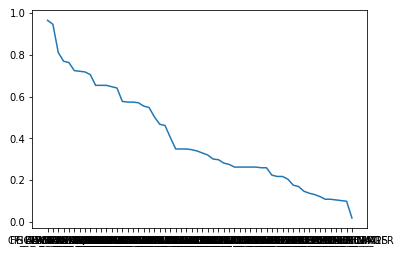

In [8]:
plt.plot(indicator_miss)

In [9]:
survey_miss = df_wide.isna().mean(axis=1).sort_values(ascending=False)
survey_miss.head()

SurveyId
ES1985DHS    0.931034
ID1987DHS    0.896552
EC1987DHS    0.879310
VN2005AIS    0.862069
PE1986DHS    0.862069
dtype: float64

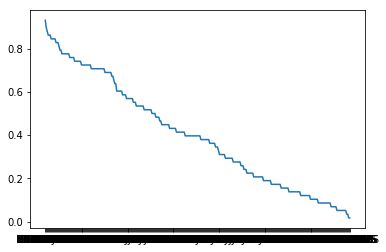

In [10]:
plt.plot(survey_miss)

# Subset to latest country survey

In [11]:
df.head()

,CountryName,DHS_CountryCode,SurveyYear,SurveyId,Indicator,IndicatorId,Value
0,Afghanistan,AF,2015,AF2015DHS,General fertility rate,FE_FRTR_W_GFR,175.0
1,Albania,AL,2008,AL2008DHS,General fertility rate,FE_FRTR_W_GFR,46.0
2,Albania,AL,2017,AL2017DHS,General fertility rate,FE_FRTR_W_GFR,57.0
3,Armenia,AM,2000,AM2000DHS,General fertility rate,FE_FRTR_W_GFR,56.0
4,Armenia,AM,2005,AM2005DHS,General fertility rate,FE_FRTR_W_GFR,58.0


In [12]:
latest_surveys = df.sort_values(['CountryName','SurveyYear'], ascending=False).drop_duplicates('CountryName')['SurveyId']
# df.sort_values(['CountryName', 'SurveyYear'], a).drop_duplicates()
latest_surveys.head()

305    ZW2015DHS
299    ZM2013DHS
293    YE2013DHS
265    VN2005AIS
288    UZ1996DHS
Name: SurveyId, dtype: object

In [13]:
df_latest = pd.merge(df, pd.DataFrame(latest_surveys))
print(len(df), len(df_latest))

10834 3146


In [14]:
df.sort_values(['CountryName', 'SurveyYear', 'IndicatorId']).head()

,CountryName,DHS_CountryCode,SurveyYear,SurveyId,Indicator,IndicatorId,Value
0,Afghanistan,AF,2015,AF2015DHS,No health insurance [Women],AH_HINS_W_NON,100.0
0,Afghanistan,AF,2015,AF2015DHS,Men who do not smoke,AH_TOBC_M_NON,51.8
0,Afghanistan,AF,2015,AF2015DHS,Women who do not smoke,AH_TOBC_W_NON,94.0
1,Afghanistan,AF,2015,AF2015DHS,Children with symptoms of ARI,CH_ARIS_C_ARI,12.6
1,Afghanistan,AF,2015,AF2015DHS,Children with diarrhea,CH_DIAR_C_DIA,28.7


In [15]:
df_wide = df_latest.pivot(index='SurveyId', columns='IndicatorId', values='Value')
indicator_miss = df_wide.isna().mean().sort_values(ascending=False)
indicator_miss.head()

IndicatorId
FG_PPCG_C_NUM    0.930233
CP_CLAB_C_CHL    0.918605
FE_AAFB_W_M2A    0.790698
HA_HIVP_B_HIV    0.732558
AH_TOBC_M_NON    0.639535
dtype: float64

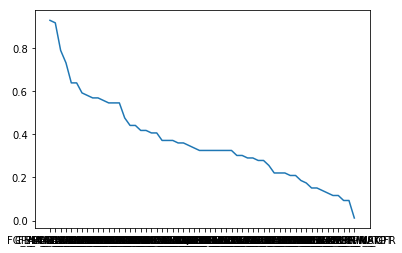

In [16]:
plt.plot(indicator_miss)

In [17]:
survey_miss = df_wide.isna().mean(axis=1).sort_values(ascending=False)
survey_miss.head()

SurveyId
ES1985DHS    0.931034
EC1987DHS    0.879310
VN2005AIS    0.862069
MX1987DHS    0.862069
SD1990DHS    0.844828
dtype: float64

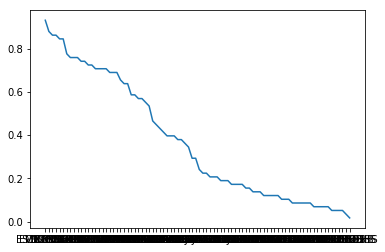

In [18]:
plt.plot(survey_miss)

In [19]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [20]:
imputer = SimpleImputer()
n_components = 10
pca = PCA(n_components=n_components)

In [21]:
df_transformed = pd.DataFrame(imputer.fit_transform(df_wide), columns=df_wide.columns, index=df_wide.index)
cols = [f'component_{i}' for i in range(0, n_components)]
df_components = pd.DataFrame(pca.fit_transform(df_transformed), columns=cols, index=df_wide.index)
df_components.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9
SurveyId,,,,,,,,,,
AF2015DHS,-1.838685,-0.062773,64.369653,-39.813936,67.295039,-20.933337,-0.677407,2.638163,-20.512016,-2.905551
AL2017DHS,-386.093128,-22.441257,-115.332281,-23.669631,-25.126999,29.913787,7.872548,-47.145470,-1.349106,8.514527
AM2016DHS,2.792738,0.213028,-126.436076,-45.419101,19.789759,42.096705,-0.678033,-21.748279,39.943978,17.706607
AO2015DHS,925.050528,53.782274,115.271110,-55.914182,-2.803000,13.125568,40.169150,18.554959,-22.242835,-12.246616
AZ2006DHS,1.576327,0.492303,-95.456074,-24.674109,33.706870,-13.676693,38.456515,4.546278,-3.373663,-19.604851


In [22]:
df_all = pd.concat([df_components, df_transformed], axis=1)
df_all.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,RH_ANCP_W_SKP,RH_ANCP_W_TOT,RH_DELA_C_TOT,RH_DELP_C_DHF,RH_PAHC_W_PR1,WE_DMKH_W_WIF,WS_SRCE_H_IMP,WS_SRCE_H_PIP,WS_TLET_H_NIM,WS_WTRT_H_APP
SurveyId,,,,,,,,,,,,,,,,,,,,,
AF2015DHS,-1.838685,-0.062773,64.369653,-39.813936,67.295039,-20.933337,-0.677407,2.638163,-20.512016,-2.905551,...,58.6,100.0,100.0,48.1,88.5,4.8,65.3,2.3,66.3,6.0
AL2017DHS,-386.093128,-22.441257,-115.332281,-23.669631,-25.126999,29.913787,7.872548,-47.145470,-1.349106,8.514527,...,88.4,100.0,100.0,98.6,37.1,14.5,83.3,48.8,3.0,4.8
AM2016DHS,2.792738,0.213028,-126.436076,-45.419101,19.789759,42.096705,-0.678033,-21.748279,39.943978,17.706607,...,99.6,100.0,100.0,99.3,64.1,28.0,98.4,88.3,22.1,5.4
AO2015DHS,925.050528,53.782274,115.271110,-55.914182,-2.803000,13.125568,40.169150,18.554959,-22.242835,-12.246616,...,81.6,100.0,100.0,45.6,70.2,21.6,52.3,4.3,52.9,32.0
AZ2006DHS,1.576327,0.492303,-95.456074,-24.674109,33.706870,-13.676693,38.456515,4.546278,-3.373663,-19.604851,...,76.6,100.0,100.0,77.7,81.8,20.1,80.3,34.0,15.2,69.7


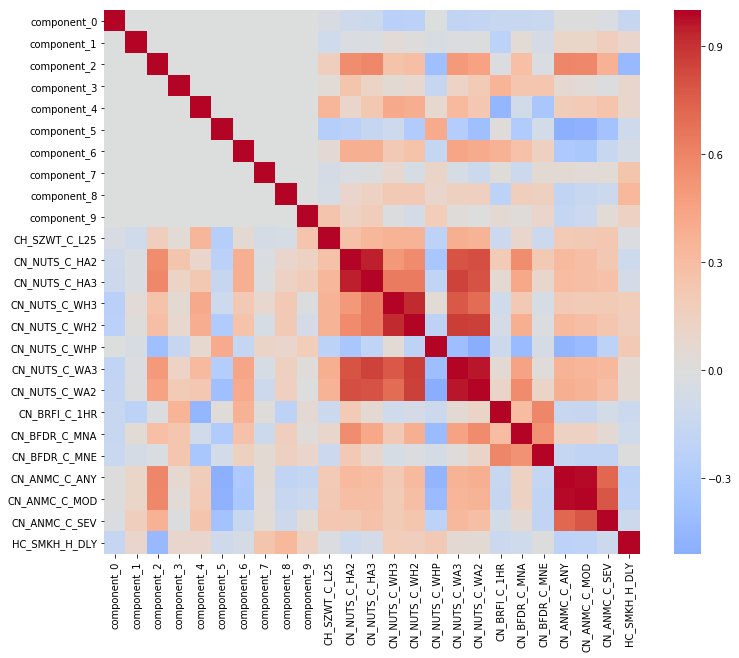

In [23]:
from src.data.download_DHS import IND_OTHER, IND_CHILD_RISKS
inds = IND_CHILD_RISKS
corr = df_all[cols + inds].corr()
plt.figure(figsize=[12,10])
g = sns.heatmap(corr,annot=False, fmt = ".2f", cmap = "coolwarm", center=0)

In [26]:
corr.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,AH_HINS_W_NON,WE_DMKH_W_WIF,FG_PPCG_C_NUM,DV_EXPV_W_12M,DV_EXSV_W_EVR,CP_CLAB_C_CHL,ED_EDUC_W_MYR,ED_EDUC_W_CPR,ED_LITR_W_LIT,HC_WIXQ_P_GNI
component_0,1.000000e+00,5.825622e-16,-1.783923e-16,-6.863077e-17,7.292798e-17,1.554189e-16,-1.281206e-16,-1.170326e-16,2.032824e-17,1.841945e-16,...,0.018476,0.249060,-0.112856,0.100844,0.147708,-0.233103,0.195586,0.003583,0.075174,-0.027790
component_1,5.825622e-16,1.000000e+00,-1.568172e-16,-2.207495e-17,4.812648e-17,1.163532e-16,-1.236346e-16,3.735650e-17,9.238036e-17,-4.244385e-18,...,-0.092419,-0.022700,0.993611,-0.028502,0.039678,0.394322,0.033913,-0.031826,-0.038833,-0.009930
component_2,-1.783923e-16,-1.568172e-16,1.000000e+00,1.415430e-16,8.262067e-18,-2.010530e-16,-1.186077e-16,-1.926706e-16,-9.507393e-17,-2.439396e-18,...,0.378433,-0.412052,0.000200,0.406394,0.410948,0.172379,-0.529599,-0.088956,-0.593490,0.361493
component_3,-6.863077e-17,-2.207495e-17,1.415430e-16,1.000000e+00,-2.772444e-16,1.225739e-17,1.304799e-16,3.071572e-16,-1.618175e-16,1.201477e-16,...,0.023758,0.283491,0.000365,-0.133156,-0.006192,-0.001459,-0.330208,0.245609,0.226194,0.215168
component_4,7.292798e-17,4.812648e-17,8.262067e-18,-2.772444e-16,1.000000e+00,-4.331129e-16,-2.400897e-17,-6.973311e-16,2.330763e-16,-1.016020e-16,...,0.215017,-0.220848,-0.000223,0.151743,-0.197241,0.121152,0.042850,-0.276741,-0.482829,-0.244536


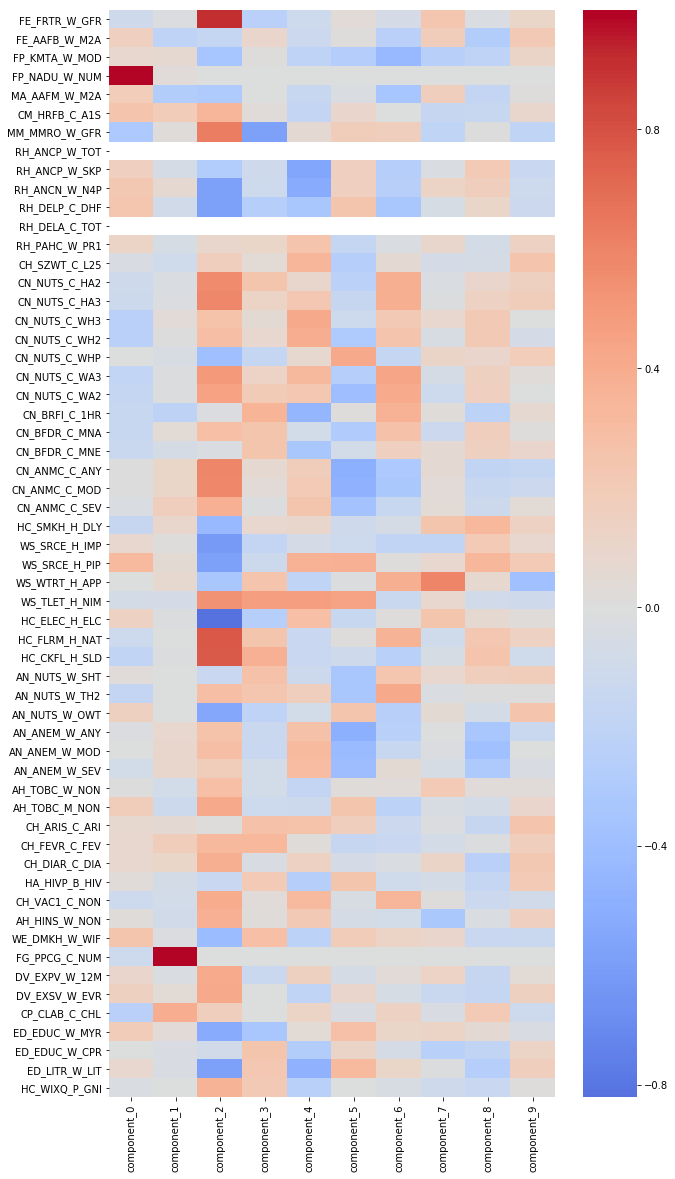

In [31]:
from src.data.download_DHS import INDICATORS
inds = [i for i in INDICATORS if i in df_all.columns]
corr = df_all[cols + inds].corr().drop(cols, axis=0).drop(inds, axis=1)
plt.figure(figsize=[10,20])
g = sns.heatmap(corr,annot=False, fmt = ".2f", cmap = "coolwarm", center=0)

In [78]:
df_components.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9
SurveyId,,,,,,,,,,
AF2015DHS,-1.838685,-0.062773,64.369653,-39.813936,67.295039,-20.933337,-0.677407,2.638163,-20.512016,-2.905551
AL2017DHS,-386.093128,-22.441257,-115.332281,-23.669631,-25.126999,29.913787,7.872548,-47.145470,-1.349106,8.514527
AM2016DHS,2.792738,0.213028,-126.436076,-45.419101,19.789759,42.096705,-0.678033,-21.748279,39.943978,17.706607
AO2015DHS,925.050528,53.782274,115.271110,-55.914182,-2.803000,13.125568,40.169150,18.554959,-22.242835,-12.246616
AZ2006DHS,1.576327,0.492303,-95.456074,-24.674109,33.706870,-13.676693,38.456515,4.546278,-3.373663,-19.604851


In [33]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8)

In [34]:
kmean.fit(df_components)
df_all['cluster'] = kmean.labels_
df_transformed['cluster'] = kmean.labels_ # pd.Series(kmean.labels_, dtype='str')
# df_transformed['cluster'] = df_transformed['cluster'].astype(str)

In [35]:
df_transformed.cluster.value_counts()

0    46
7    13
2    12
6     6
3     6
5     1
4     1
1     1
Name: cluster, dtype: int64

In [36]:
df_transformed[['cluster']].head()

IndicatorId,cluster
SurveyId,
AF2015DHS,0
AL2017DHS,2
AM2016DHS,0
AO2015DHS,3
AZ2006DHS,0


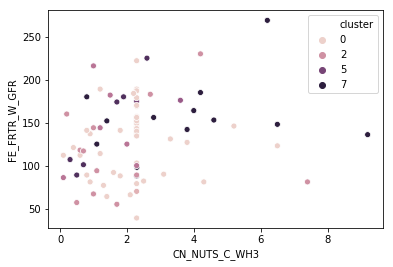

In [37]:
sns.scatterplot('CN_NUTS_C_WH3', 'FE_FRTR_W_GFR', hue='cluster', data=df_transformed)

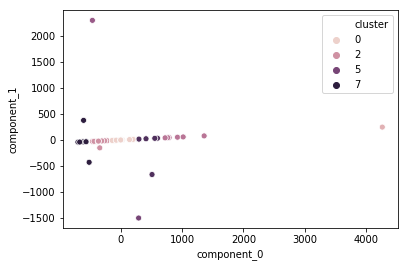

In [38]:
sns.scatterplot('component_0', 'component_1', hue='cluster', data=df_all)

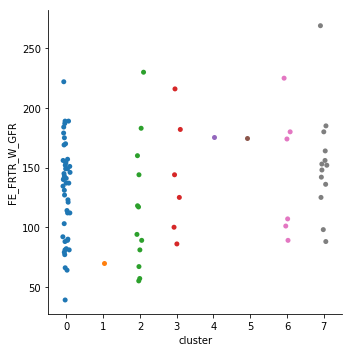

In [39]:
sns.catplot("cluster", y="FE_FRTR_W_GFR", data=df_all)

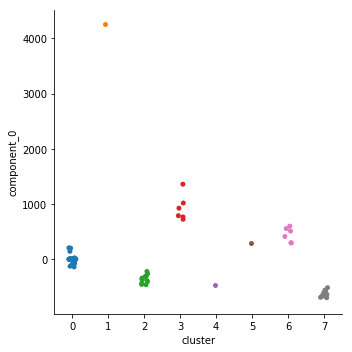

In [40]:
sns.catplot("cluster", y="component_0", data=df_all)

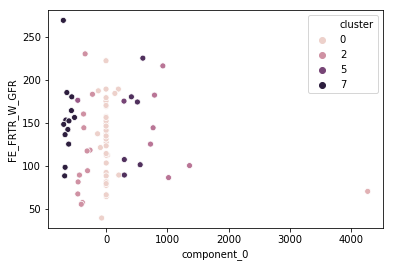

In [41]:
sns.scatterplot('component_0', 'FE_FRTR_W_GFR', hue='cluster', data=df_all)

In [46]:
inds = [i for i in INDICATORS if i in df_all.columns]
data = df_all.groupby('cluster')[inds].mean().T
data.head()
# plt.figure(figsize=[10,20])
# g = sns.heatmap(data,annot=False, fmt = ".2f", cmap = "coolwarm", center=0)

cluster,0,1,2,3,4,5,6,7
FE_FRTR_W_GFR,130.923018,70.000000,116.250000,142.166667,176.0,175.000000,146.000000,153.538462
FE_AAFB_W_M2A,19.291908,19.305556,19.245833,19.419444,18.8,19.305556,19.519444,19.296581
FP_KMTA_W_MOD,93.874466,99.800000,92.200000,90.350000,89.8,82.400000,95.800000,91.161538
FP_NADU_W_NUM,715.771739,4982.000000,351.750000,1644.333333,387.0,918.000000,1152.333333,83.307692
MA_AAFM_W_M2A,18.613534,18.574194,18.409946,18.761828,17.2,19.900000,19.112366,18.255335


In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler() # StandardScaler()
data = pd.DataFrame(scaler.fit_transform(df_all.drop('cluster', axis=1)), 
             columns=df_all.drop('cluster', axis=1).columns, index=df_all.index)
data['cluster'] = df_all['cluster']
data.head()
data = data.groupby('cluster')[inds].mean().T
data.head()

cluster,0,1,2,3,4,5,6,7
FE_FRTR_W_GFR,0.399665,0.134783,0.335870,0.448551,0.595652,0.591304,0.465217,0.497993
FE_AAFB_W_M2A,0.662171,0.669753,0.636574,0.733025,0.388889,0.669753,0.788580,0.664767
FP_KMTA_W_MOD,0.838023,0.997312,0.793011,0.743280,0.728495,0.529570,0.889785,0.765095
FP_NADU_W_NUM,0.140393,1.000000,0.067046,0.327490,0.074149,0.181140,0.228357,0.012957
MA_AAFM_W_M2A,0.669889,0.660522,0.621416,0.705197,0.333333,0.976190,0.788658,0.584604


In [56]:
StandardScaler?

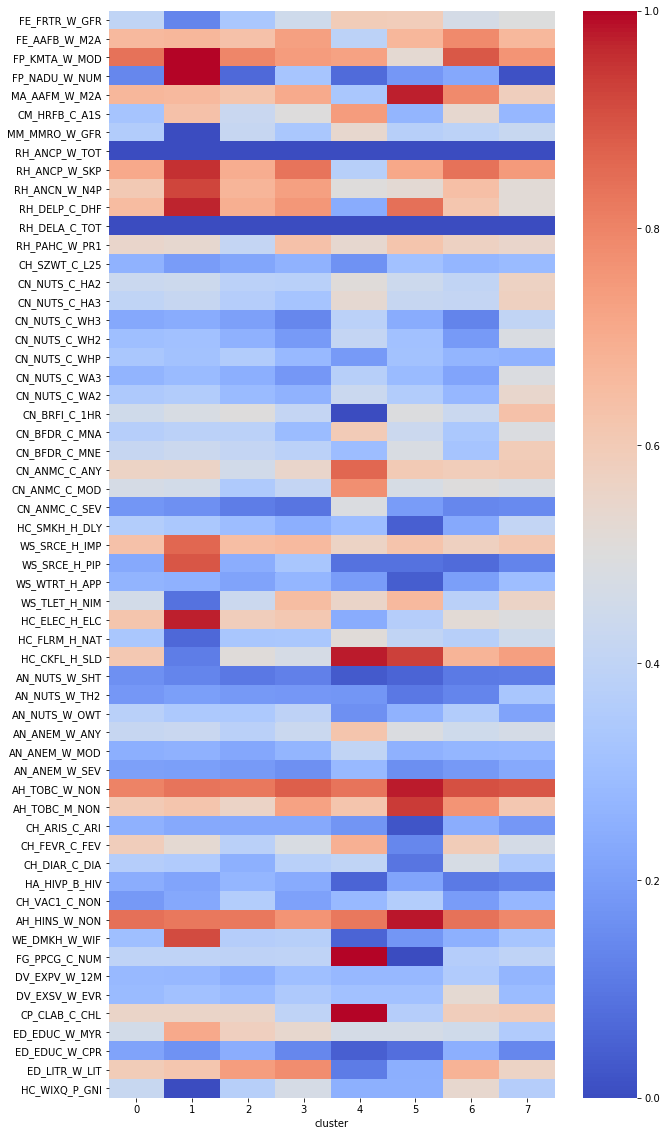

In [59]:
plt.figure(figsize=[10,20])
g = sns.heatmap(data,annot=False, fmt = ".2f", cmap = "coolwarm", center=0.5)

# Map clusters

In [29]:
from src.data.download_DHS import load_country_codebook
codebook = load_country_codebook()

In [30]:
dhs_country_codebook = pd.merge(codebook[['CountryName', 'ISO3_CountryCode']], df.drop_duplicates('SurveyId')[['SurveyId', 'CountryName']])
dhs_country_codebook.head()

,CountryName,ISO3_CountryCode,SurveyId
0,Afghanistan,AFG,AF2015DHS
1,Albania,ALB,AL2008DHS
2,Albania,ALB,AL2017DHS
3,Angola,AGO,AO2006MIS
4,Angola,AGO,AO2011MIS


In [31]:
df_clusters = pd.merge(dhs_country_codebook, df_transformed.reset_index())
df_clusters.head()

,CountryName,ISO3_CountryCode,SurveyId,AH_HINS_W_NON,AH_TOBC_M_NON,AH_TOBC_W_NON,AN_ANEM_W_ANY,AN_ANEM_W_MOD,AN_ANEM_W_SEV,AN_NUTS_W_OWT,...,RH_ANCP_W_TOT,RH_DELA_C_TOT,RH_DELP_C_DHF,RH_PAHC_W_PR1,WE_DMKH_W_WIF,WS_SRCE_H_IMP,WS_SRCE_H_PIP,WS_TLET_H_NIM,WS_WTRT_H_APP,cluster
0,Afghanistan,AFG,AF2015DHS,100.000000,51.800000,94.000000,37.784615,8.453846,0.646154,33.459259,...,100.0,100.0,48.1,88.5,4.8,65.3,2.3,66.3,6.0,6
1,Albania,ALB,AL2017DHS,62.200000,64.400000,95.191111,22.700000,3.000000,0.400000,45.200000,...,100.0,100.0,98.6,37.1,14.5,83.3,48.8,3.0,4.8,0
2,Angola,AGO,AO2015DHS,85.140541,84.300000,98.100000,37.784615,8.453846,0.646154,33.459259,...,100.0,100.0,45.6,70.2,21.6,52.3,4.3,52.9,32.0,2
3,Armenia,ARM,AM2016DHS,93.000000,68.554839,99.300000,13.400000,1.300000,0.200000,45.000000,...,100.0,100.0,99.3,64.1,28.0,98.4,88.3,22.1,5.4,6
4,Azerbaijan,AZE,AZ2006DHS,99.300000,50.900000,95.191111,37.000000,7.200000,0.800000,47.400000,...,100.0,100.0,77.7,81.8,20.1,80.3,34.0,15.2,69.7,6


In [32]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [33]:
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [35]:
# # Standard plotly imports
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot
# # Using cufflinks in offline mode
# import cufflinks
# cufflinks.go_offline()

In [80]:
scale = [[0, 'rgb(166,206,227)'], 
         [1, 'rgb(31,120,180)'], 
         [2, 'rgb(178,223,138)'], 
         [3, 'rgb(51,160,44)'], 
         [4, 'rgb(251,154,153)'],
         [5, 'rgb(251,154,153)'],
         [6, 'rgb(251,154,153)'],
         [7, 'rgb(227,26,28)']]

In [103]:
data = [dict(type='choropleth',
           locations=df_clusters['ISO3_CountryCode'], 
           z = df_clusters['cluster'],
            text=df_clusters['CountryName'],
             colorscale='Blackbody', #scale, Rainbow
             autocolorscale = False,
            colorbar = {'title': 'Indicator'}
            )]

In [104]:
layout = dict(title='My Title',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

In [105]:
fig = dict(data=data, layout=layout)
iplot(fig)